<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Packages
<a class="anchor" id="1"></a> 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import string
import re

import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Data
<a class="anchor" id="1"></a> 

In [62]:
df_ganjar = pd.read_json(r"C:\Users\Zagreus\Documents\GitHub\NLP_Dashboard\Scraper\data_clean\userProfile_ganjarpranowo.json")
df_prabowo = pd.read_json(r"C:\Users\Zagreus\Documents\GitHub\NLP_Dashboard\Scraper\data_clean\userProfile_prabowo.json")
df_anies = pd.read_json(r"C:\Users\Zagreus\Documents\GitHub\NLP_Dashboard\Scraper\data_clean\userProfile_aniesbaswedan.json")
df_ahy = pd.read_json(r"C:\Users\Zagreus\Documents\GitHub\NLP_Dashboard\Scraper\data_clean\userProfile_AgusYudhoyono.json")
df_ridwan = pd.read_json(r"C:\Users\Zagreus\Documents\GitHub\NLP_Dashboard\Scraper\data_clean\userProfile_ridwankamil.json")

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
LDA With SKlearn
<a class="anchor" id="1"></a> 

In [1]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [64]:
dictionary = gensim.corpora.Dictionary(df_ganjar['text_token'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 banget
1 ireng
2 jumat
3 launching
4 nari
5 neng
6 nusantara
7 pakai
8 selasela
9 topeng
10 tradisional


In [66]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df_ganjar['text_token']]

tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

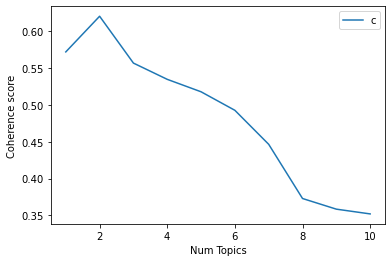

In [70]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=df_ganjar['text_token'],
                                                        start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [71]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.57195
Num Topics = 2  has Coherence Value of 0.620381
Num Topics = 3  has Coherence Value of 0.556767
Num Topics = 4  has Coherence Value of 0.5347
Num Topics = 5  has Coherence Value of 0.517801
Num Topics = 6  has Coherence Value of 0.492643
Num Topics = 7  has Coherence Value of 0.446473
Num Topics = 8  has Coherence Value of 0.372896
Num Topics = 9  has Coherence Value of 0.358427
Num Topics = 10  has Coherence Value of 0.351964


In [72]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=2) #num topic menyesuaikan hasil dari coherence value paling tinggi

In [75]:
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.save_html(data, 'lda-gensim-tfidf.html')

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [4]:
pyLDAvis.prepare()

TypeError: prepare() missing 5 required positional arguments: 'topic_term_dists', 'doc_topic_dists', 'doc_lengths', 'vocab', and 'term_frequency'

In [5]:
pyLDAvis.__version__

'3.3.0'